In [59]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

In [67]:
def load_data(file_name, class_label, X, Y):
    with open(file_name) as input_file:
        line = input_file.readline()
        while line:
            X.append(line[:-1].split(',')[:-1])
            Y.append(class_label)
            line = input_file.readline()


In [89]:
X = []
Y = []
num_classes = 5
gestures = ['thumbs_up','thumbs_down','check','cross','ok_sign']
for i,gesture in enumerate(gestures):
    load_data(gesture+'.csv',i, X, Y)
X = np.array(X)
Y = np.array(Y)
X = X.astype(np.float64)
print(X.shape)
print(Y.shape)


(188, 126)
(188,)


In [92]:
confidence_threshold = 0.2
num_points = 42
percent_points_confident = 0.3 
def preprocess(X, Y):
    processed_X, processed_Y = [], []
    for i,x in enumerate(X):
        confidences = x[2::3]
        if np.count_nonzero(confidences>confidence_threshold)>percent_points_confident*42:
            processed_X.append(x)
            processed_Y.append(Y[i])
    processed_X = np.array(processed_X)
    processed_Y = np.array(processed_Y)
    return processed_X, processed_Y

In [100]:
# X_array,Y_array = preprocess(X,Y)
X_array, Y_array = np.array(X), np.array(Y)
print(X_array.shape)
print(Y_array.shape)

(188, 126)
(188,)


In [101]:
def testPerformance(clf, X, Y):
    # print(X.shape)
    # print(Y.shape)
    scores = []
    classIncorrect = [0]*num_classes
    classTotal = [0]*num_classes
    for train_index, test_index in cv.split(X):
    #     print("Train Index: ", train_index)
    #     print("Test Index: ", test_index)
        X_train, X_test, y_train, y_test = X[train_index], X[test_index], Y[train_index], Y[test_index]
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        for i,t in enumerate(y_test):
            if y_test[i]!= pred[i]:
    #             print(y_test[i],pred[i])
                classIncorrect[y_test[i]]+=1
            classTotal[y_test[i]]+=1
        s = clf.score(X_test, y_test)
        scores.append(s)
    print('Num incorrect for each class: ', classIncorrect, 'Num total for each class: ', classTotal)
    classAccuracy = [(classTotal[i]-classIncorrect[i])/classTotal[i] for i in range(len(classTotal))]
    print("Class accuracy")
    print(classAccuracy)
    print("Mean accuracy:" + str(np.mean(scores)))
    print(scores)    

Num incorrect for each class:  [0, 2, 0, 2, 3] Num total for each class:  [39, 46, 33, 39, 31]
Class accuracy
[1.0, 0.9565217391304348, 1.0, 0.9487179487179487, 0.9032258064516129]
Mean accuracy:0.9628654970760234
[0.9473684210526315, 0.8947368421052632, 1.0, 1.0, 1.0, 0.9473684210526315, 1.0, 0.8947368421052632, 0.9444444444444444, 1.0]
Confusion matrix, without normalization
[[39  0  0  0  0]
 [ 1 45  0  0  0]
 [ 0  0 33  0  0]
 [ 1  0  0 38  0]
 [ 0  0  0  0 31]]
Normalized confusion matrix
[[1.   0.   0.   0.   0.  ]
 [0.02 0.98 0.   0.   0.  ]
 [0.   0.   1.   0.   0.  ]
 [0.03 0.   0.   0.97 0.  ]
 [0.   0.   0.   0.   1.  ]]


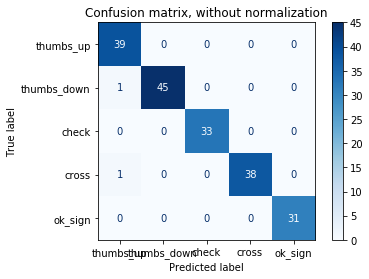

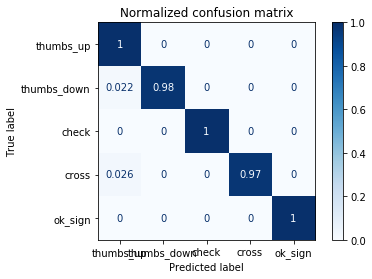

In [102]:
cv = KFold(n_splits=10, shuffle=True, random_state=10)
clf = KNeighborsClassifier(n_neighbors=2)
testPerformance(clf, X_array, Y_array)
from sklearn.metrics import plot_confusion_matrix


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_array, Y_array,
                                 display_labels=gestures,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()